# Solución numérica de ecuaciones diferenciales
##  0. Introducción

### 0.1 Ecuaciones diferenciales

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/39/GodfreyKneller-IsaacNewton-1689.jpg" width="150px" height="150px" />

> Las primeras ecuaciones diferenciales se encuentran históricamente con la invención del cálculo por Newton y Leibniz. En el Capítulo 2 de su trabajo "Methodus fluxionum et Serierum Infinitarum", (Newton, 1671), Newton describe ecuaciones del tipo

$$\frac{dy(x)}{dx}=f(x,y(x)).$$

**Referencia**
- https://en.wikipedia.org/wiki/Differential_equation
- https://www.mathsisfun.com/calculus/differential-equations.html

Decimos que hemos resuelto la ecuación diferencial si descubrimos la función $y(x)$ (o conjunto de funciones $y(x)$).

**Ejemplo** Estudiar la ecuación diferencial:

$$\frac{\text{d}x}{\text{d}t}=a x(t), \quad a \in \mathbb{R}.$$

___
Cuando una ecuación puede ser resuelta, hay varios trucos para intentar resolverla. En muchos casos, no es posible o es muy difícil encontrar la solución analítica. Por eso, en el curso examinaremos la forma de encontrar solución numérica.

### 0.1.1. ¿Porqué son útiles las ecuaciones diferenciales?

Antes qué nada, conceptualmente, **¿qué significa la derivada $\frac{dx}{dt}$?**

Nuestro mundo, y particularmente los fenómenos que estudiamos en ingeniería, es cambiante (evoluciona) en el tiempo. De modo que las descripciones (modelos) de como cambian las cosas en el tiempo terminan como una ecuación diferencial.

### 0.1.2. Ejemplos
1. Biología: Crecimiento poblacional de conejos
2. Finanzas: Interés continuamente compuesto
3. Mecánica Clásica: Péndulo simple.

<font color=green>Las ecuaciones diferenciales pueden describir como cambia la población, como se dispersa el calor, como un material radioactivo se desintegra y mucho más. Son una forma natural de describir cambios o movimiento en el universo..</font>

### 0.2 Ecuaciones en Diferencias
> Las Ecuaciones en Diferencias han adquirido importancia relevante con el creciente estudio y simulación de **sistemas discretos** en las diferentes disciplinas que modelan y estudian sistemas en la ingeniería, dado que este tipo de modelado es más ajustado a la realidad. Llamamos Ecuación en Diferencias a las ecuaciones del tipo
$$
f\big(k,y(k),y(k+1)\big)=0.
$$

**Referencia**
* https://es.wikipedia.org/wiki/Ecuaciones_en_diferencias
* https://personal.us.es/pnadal/Informacion/leccion5ecdiferencias.pdf


Llamamos solución a la Ecuación en Diferencias a la sucesión completa de $\{y(0),y(1),\dots,y(k),\dots\}$.

**Ejemplo** Explorar la solución para $y(k)$ para las condiciones: 1) $y(0)=1$ y 2) $y(0)=0$.

$$
y(k+1)=ay(k),\quad a\in\mathbb{R}.
$$

## 1. `ODEint` y `Solve_IVP`

### 1.1 ¿Cómo crece una población?


El modelo más simple de crecimiento poblacional de organismos es $\frac{dx}{dt}=rx$, donde $x(t)$ es la población en el tiempo $t$ y $r>0$ es la tasa de crecimiento.

Este modelo predice crecimiento exponencial $x(t)=x_0e^{rt}$ (solución de la ecuación diferencial) donde $x_0=x(0)$ es la población inicial. ¿Es esto válido?
- Recordar que $\lim_{t\to\infty}x(t)=x_0\lim_{t\to\infty}e^{rt}=\infty$.
- Este modelo no tiene en cuenta entonces sobrepoblación ni recursos limitados.

En realidad la tasa de crecimiento no es una constante, sino que depende de la población $\frac{dx}{dt}=\mu(x)x$. Cuando $x$ es pequeña $\mu(x)\approx r$, como antes, pero cuando $x>1$ y $\mu(x)<0$: la tasa de muerte es mayor a la tasa de nacimiento. Una forma matemática conveniente de modelar lo anterior es con una tasa de crecimiento $\mu(x)$ decreciendo linealmente con $x$.

**Referencia**:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

### Ecuación Logística
Primero, veamos como luce $\mu(x)$ con decrecimiento lineal respecto a la población $x$.

Como queremos que $\mu(0)=r$ y $\mu(1)=0$, la línea recta que conecta estos puntos es... (graficar)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

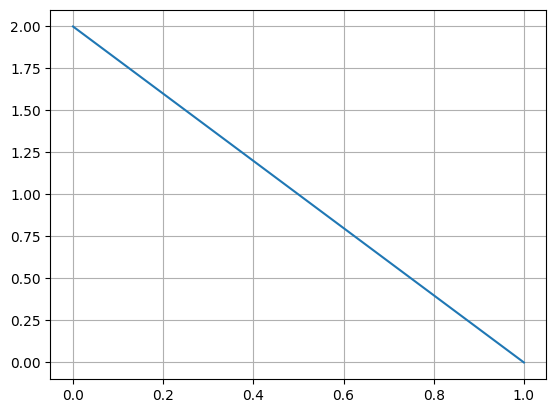

In [ ]:
r=2
x=np.linspace(0,1,10)
mu=r*(1-x)

plt.plot(x,mu)
plt.grid()

___
Entonces, con esta elección de $\mu(x)=r(1-x)$, obtenemos la llamada **ecuación lógistica**, publicada por Pierre Verhulst en 1838.

$$\frac{dx}{dt} = r\; x\; (1- x)$$

Numéricamente, ¿cómo resolveríamos esta ecuación?

In [ ]:
from scipy.integrate import odeint,solve_ivp

In [ ]:
#@title Usando `ODEint`
#odeint?

In [ ]:
# Definimos la ecuación diferencial en el entorno 'def'
def fun(x,t,r):
  mu=r*(1-x)
  return mu*x

In [ ]:
# Definimos la condición inicial
x0=0.0203
t=np.arange(0,10,0.1) # Definimos el tiempo entre 0 y 10 unidades de tiempo, con intervalos de 0.1
r=2                   # La población crece el doble en cada unidad de tiempo (digamos, años)

x=odeint(fun,x0,t,args=(r,)) # args debe ser una tupla
x.shape                      # Tamaño de 'x'

(100, 1)

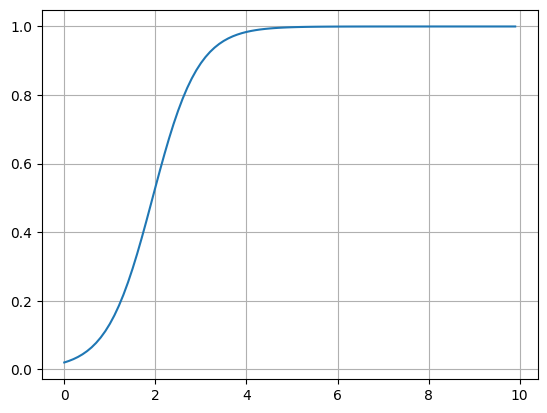

In [ ]:
plt.plot(t,x)
plt.grid()

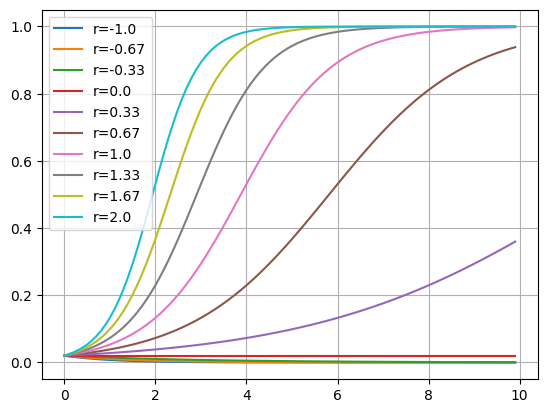

In [ ]:
Tasas=np.linspace(-1,2,10)
for r in Tasas:
  x=odeint(fun,x0,t,args=(r,))
  plt.plot(t,x,label='r='+str(round(r,2))) # str  ->  convierte 'r' a texto
plt.legend()                               # muestra las etiquetas
plt.grid()

In [ ]:
#@title Usando Solve_IVP
# solve_ivp?

In [ ]:
def fun(t,x,r):
  return r*(1-x)*x

In [ ]:
x0=[0.0203] # La condición inicial es un arreglo
t_span=(0,10)
r=0.5

sol=solve_ivp(fun,t_span,x0,args=(r,))
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.165e-01  1.281e+00  3.599e+00  6.456e+00
             9.855e+00  1.000e+01]
        y: [[ 2.030e-02  2.149e-02  3.783e-02  1.114e-01  3.436e-01
              7.413e-01  7.549e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0

In [ ]:
sol.y.shape

(1, 7)

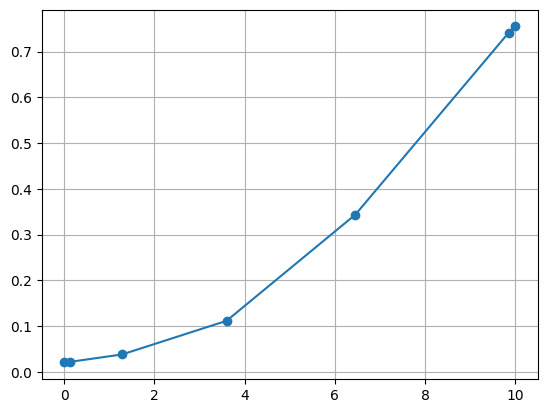

In [ ]:
plt.plot(sol.t,sol.y.T,'-o') # .T  ->  transpuesta
plt.grid()

In [ ]:
# Especificamos más puntos en la solución
sol=solve_ivp(fun,t_span,x0,args=(r,),max_step=0.1)
sol.y.shape

(1, 102)

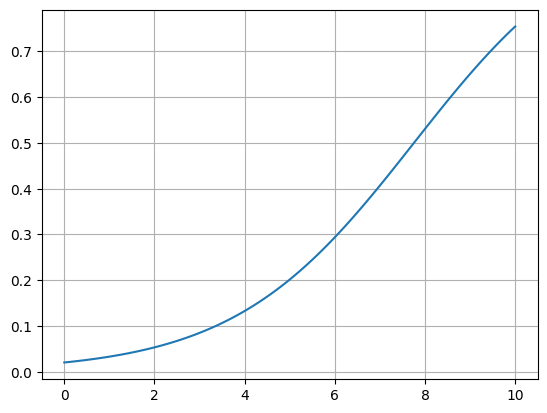

In [ ]:
plt.plot(sol.t,sol.y.T)
plt.grid()

### Error de la solución numérica
**¿Qué tan buena es la aproximación de la solución numérica?**

Hay ecuaciones diferenciales ordinarias no lineales para las cuales es imposible obtener la solución exacta. En estos casos, se evalúa una solución aproximada de forma numérica.

Para el caso anterior es posible obtener la solución exacta, lo cual nos permite comparar ambas soluciones y evaluar qué tan buena es la aproximación que nos brinda la solución numérica.

**Solución a la ecuación diferencial**: La ecuación diferencial inicial tiene *solución analítica*,
$$ x(t) = \frac{1}{1+ \left(\frac{1}{x_{0}}- 1\right) e^{-rt}}.$$

Veamoslo graficamente

In [ ]:
def logis(x0,t,r):
  return 1/(1+(1/x0-1)*np.exp(-r*t))

In [ ]:
# Elección de parámetros
x0=0.2                   # Condición inicial
r=1                      # Tasa de crecimiento
t=np.linspace(0,10,100)  # Time

In [ ]:
def f_odeint(x,t,r):
  return r*(1-x)*x
def f_solveIvp(t,x,r):
  return r*(1-x)*x

In [ ]:
x_real1=logis(x0,t,r)
x_odeint=odeint(f_odeint,x0,t,args=(r,))
sol=solve_ivp(f_solveIvp,(min(t),max(t)),[x0],args=(r,),max_step=0.1)
x_real2=logis(x0,sol.t,r)

In [ ]:
x_solveIvp=sol.y.T

Comparamos entonces ambas gráficas

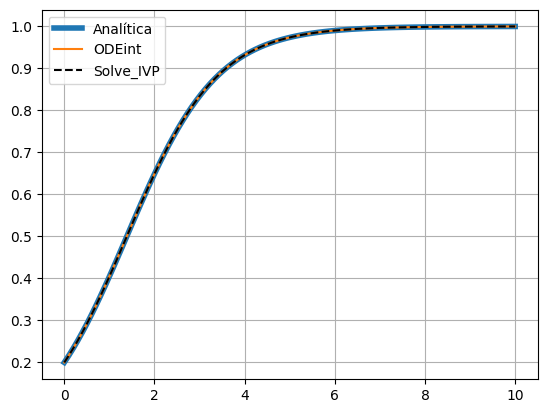

In [ ]:
plt.plot(t,x_real1,label='Analítica',lw=4) # lw=line width
plt.plot(t,x_odeint,label='ODEint')
plt.plot(sol.t,x_solveIvp,'--k',label='Solve_IVP')
plt.legend()
plt.grid()

Gráficamente vemos que la solución numérica está cerca (coincide) con la solución exacta. Sin embargo, con esta gráfica no podemos visualizar qué tan cerca están una solución de la otra. ¿Qué tal si evaluamos el error?

In [ ]:
error1=np.abs(x_real1-x_odeint[:,0])
error2=np.abs(x_real2-x_solveIvp[:,0])

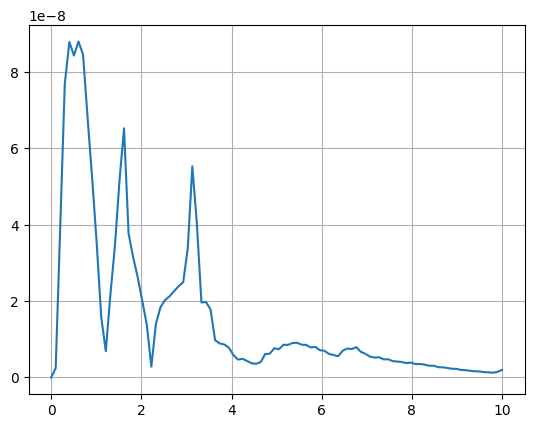

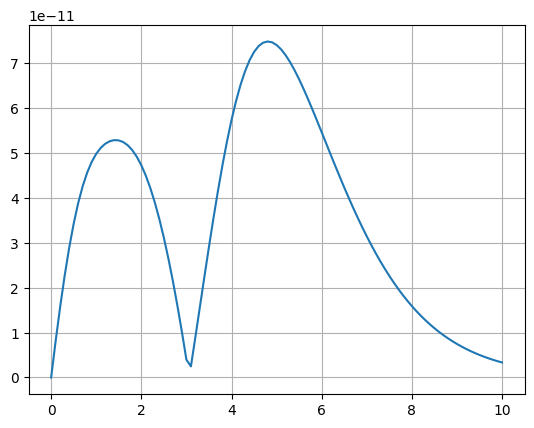

In [ ]:
plt.plot(t,error1)
plt.grid()
plt.figure()
plt.plot(sol.t,error2)
plt.grid()

Entonces, **cualitativamente** ya vimos que la solución numérica es *suficientemente buena*. De todas maneras, es siempre bueno cuantificar *qué tan buena* es la aproximación. Varias formas:
- <font color=blue>Norma del error</font>: tenemos el error de aproximación en ciertos puntos (especificados por el vector de tiempo). Este error es entonces un vector y le podemos tomar su norma 2

$$||e||_2=\sqrt{e[0]^2+\dots+e[n-1]^2}$$

In [ ]:
np.sqrt(np.sum(error1**2)) # Norma euclideana para odeint

2.6562057859560424e-07

In [ ]:
np.sqrt(np.sum(error2**2)) # Norma euclideana para solve_ivp

4.22761411936653e-10

- <font color=blue>Error cuadrático medio</font>: otra forma de cuantificar es con el error cuadrático medio

$$e_{ms}=\frac{e[0]^2+\dots+e[n-1]^2}{n}$$

In [ ]:
np.mean(error1**2) # Error cuadrático medio para odeint

7.055429177346358e-16

In [ ]:
np.mean(error2**2) # Error cuadrático medio para solve_ivp

1.7522275629673766e-21

- <font color=blue>Integral del error cuadrático</font>: evalúa la acumulación de error cuadrático. Se puede leevar a cabo con la siguiente aproximación rectangular de la integral

$$e_{is}=\int_{0}^{t_f}e(t)^2\text{d}t\approx \left(e[0]^2+\dots+e[n-1]^2\right)h$$

donde $h$ es el tamaño de paso del vector de tiempo.

In [ ]:
np.sum(error1**2)*0.1 # Aproximación de la integral del error cuadrático para odeint

7.055429177346358e-15

In [ ]:
h=sol.t[1:]-sol.t[:-1] # Diferencias de tiempo en cada paso de integración
np.dot((error2**2)[:-1],h) # Euler hacia atras

1.7870484389086167e-20

In [ ]:
np.dot((error2**2)[1:],h) # Euler hacia adelante

1.7871602765676682e-20

#### Comentarios del modelo logístico
El modelo no se debe tomar literalmente. Más bien se debe interpretar metefóricamente como que la población tiene una tendencia a crecer hasta su tope, o bien, desaparecer.

La ecuación logística fue probada en experimentos de laboratorio para colonias de bacterias en condiciones de clima constante, abastecimiento de comida y ausencia de predadores. Los experimentos mostraron que la ecuación predecía muy bien el comportamiento real.

Por otra parte, la predicción no resultó tan buena para moscas que se alimentan de frutas, escarabajos y otros organismos con ciclos de vida complejos. En esos casos se observaron fluctuaciones (oscilaciones) inmensas de la población.

___
### Mapa logístico
> La ecuación logística (curva de crecimiento logístico) es un modelo del crecimiento continuo en el tiempo. Una modificación de la ecuación continua a una ecuación de recurrencia discreta conocida como **mapa logistico** es muy usada.

Referencia:
- https://es.wikipedia.org/wiki/Aplicación_log%C3%ADstica
- https://en.wikipedia.org/wiki/Logistic_map

Si reemplazamos la ecuación logísitica por la ecuación a diferencias:

$$x_{n+1} = r\; x_{n}(1- x_{n}),$$

donde $r$ es la razón de crecimiento máximo de la población y $x_{n}$ es la n-ésima iteración. Entonces, lo que tenemos que programar es la siguiente relación recursiva

$$x_{n+1}^{(r)} = f_r(x_n^{(r)}) = rx_n^{(r)}(1-x_n^{(r)})$$

El siguiente `gif` muestra las primeras 63 iteraciones de la anterior ecuación para diferentes valores de $r$ variando entre 2 y 4.

<img style="float: center;" src="https://upload.wikimedia.org/wikipedia/commons/1/1f/Logistic_map_animation.gif" width="800px" height="400px" />

Tomado de https://upload.wikimedia.org/wikipedia/commons/1/1f/Logistic_map_animation.gif.

Note que:
- Para $2<r<3$ las soluciones se estabilizan en un valor de equilibrio.
- Para $3<r<1+\sqrt{6}\approx 3.44949$ las soluciones oscilan entre dos valores.
- Para $3.44949<r<3.54409$ las soluciones oscilan entre cuatro valores.
- Para $r>3.54409$ las soluciones exhiben un comportamiento **caótico**.

<font color=red> Caos: comportamiento determinista aperiódico muy sensible a las condiciones iniciales. Es decir, pequeñas variaciones en dichas condiciones iniciales pueden implicar grandes diferencias en el comportamiento futuro</font>

**¿Cómo podemos capturar este comportamiento en una sola gráfica?**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def logis(x,n,r):
  return r*x*(1-x)

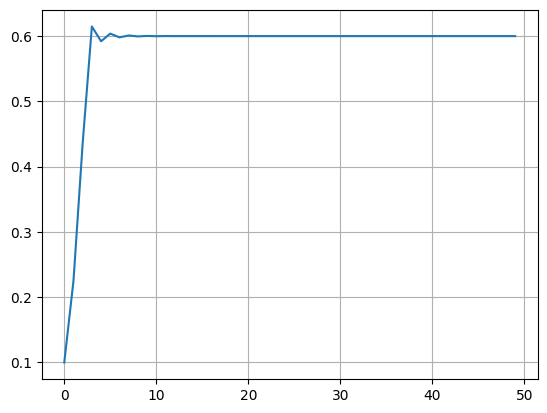

In [12]:
# Simulamos 50 periodos de tiempo
#
x0=0.1
x=[x0]
r=2.5
for n in range(1,50):
  x.append(logis(x[-1],n,r))

plt.plot(range(50),x)
plt.grid()

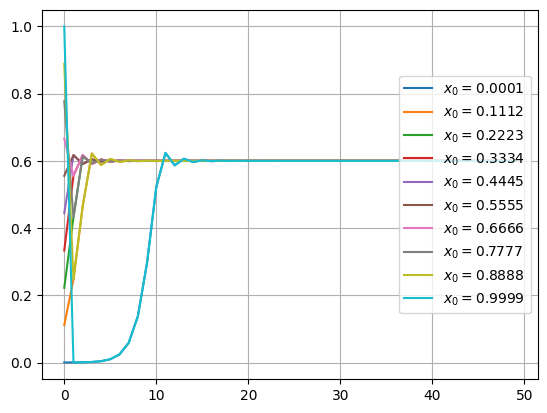

In [20]:
# Simulación con múltiples condiciones iniciales
X0=np.linspace(0.0001,0.9999,10)
for x0 in X0:
  x=[x0]
  r=2.5
  for n in range(1,50):
    x.append(logis(x[-1],n,r))

  plt.plot(range(50),x,label='$x_0={}$'.format(round(x0,4)))
plt.legend(loc='center right')
plt.grid()

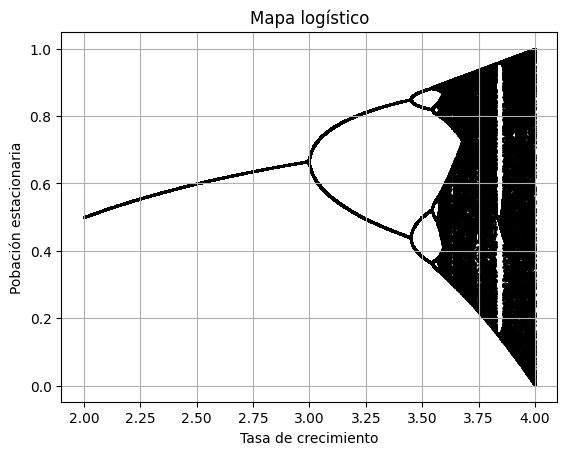

In [28]:
# Simulación con múltiples tasas de crecimiento
R=np.arange(2,4,0.001)
x0=0.5
for r in R:
  x=[x0]
  for n in range(1,500):
    x.append(logis(x[-1],n,r))
  plt.scatter(r*np.ones(100),x[-100:],s=1,c='k')
plt.xlabel('Tasa de crecimiento')
plt.ylabel('Pobación estacionaria')
plt.title('Mapa logístico')
plt.grid()

---
Video cortesía de Veritasium

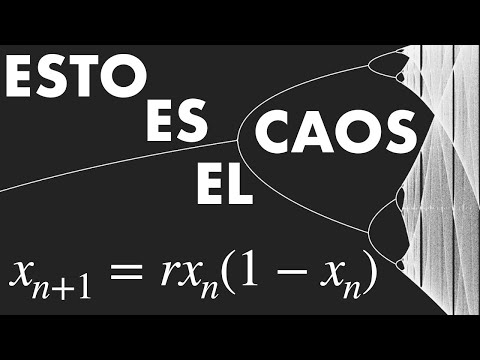

In [32]:
from IPython.display import YouTubeVideo
YouTubeVideo('EOvLhZPevm0')